# CPS2.3 - Computer Problem Set 2.3
### **Profit & Loss of the Black-Scholes hedging**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
# ------ Variables ------ #

T = 2   # Time to maturity
M = 1000    # Number of simulations
S0 = 100    # Initial stock price
sigma_0 = 0.2   # Initial volatility
Lambda = 2 
gamma = 0.3
r = 0.02
c = 0.03

# ----------------------- #

## 1 - Discrete Path of $\sigma_t$ 

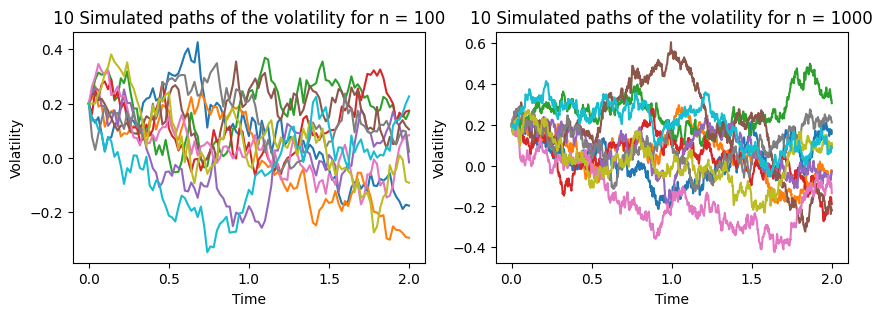

In [4]:
# Creeating the Brownian motion paths
def create_W(M,n,T):
    W = np.zeros((n+1,M))
    dt = T/n
    W[1:n+1,:] = np.sqrt(dt)*np.random.randn(n,M)
    W = np.cumsum(W,axis=0)
    return W

def simu_path_sigma(M,sigma_0, Lambda, gamma, T, N):
    Sigma_Paths = np.zeros((N+1,M))
    Sigma_Paths[0,:] = sigma_0
    W2 = create_W(M,N,T)
    for i in range(1,N+1):
        Sigma_Paths[i,:] = Sigma_Paths[i-1,:] + Lambda*(c-Sigma_Paths[i-1,:])*T/N + gamma*(W2[i,:] - W2[i-1,:])
    return Sigma_Paths

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title("10 Simulated paths of the volatility for n = 100")
plt.plot(np.linspace(0,T,100+1),simu_path_sigma(10, sigma_0, Lambda, gamma, T, 100))

plt.xlabel("Time")
plt.ylabel("Volatility")
plt.subplot(1,2,2)
plt.title("10 Simulated paths of the volatility for n = 1000")
plt.plot(np.linspace(0,T,1001),simu_path_sigma(10, sigma_0, Lambda, gamma, T, 1000))
plt.xlabel("Time")
plt.ylabel("Volatility")

plt.show()

## 2 - Discrete Path of $S_t$

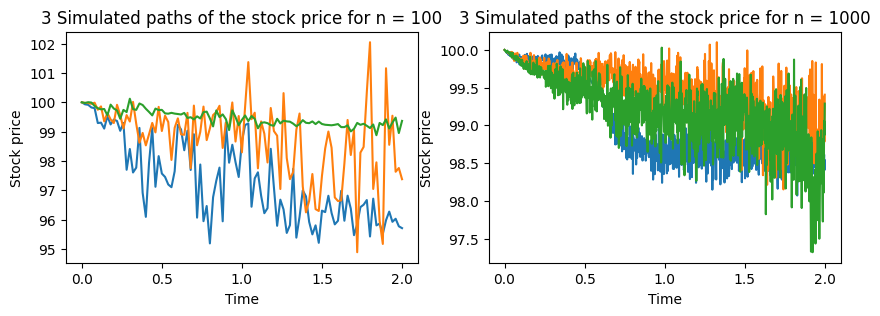

In [5]:
def simu_path_S(M,S0,sigma_0, Lambda, gamma, T, N):
    S_Paths = np.zeros((N+1,M))
    Sigma_Paths = simu_path_sigma(M,sigma_0, Lambda, gamma, T, N)
    Sigma_Paths_squared = Sigma_Paths**2
    S_Paths[0,:] = S0
    W1 = create_W(M,N,T)
    for i in range(1,N+1):
        first_integral = np.sum(Sigma_Paths_squared[:i,:],axis=0)*T/N
        second_integral = np.sum(Sigma_Paths[:i,:]*(W1[i,:]-W1[i-1,:]),axis=0)*T/N
        S_Paths[i,:] = S0 * np.exp(-0.5*(first_integral + second_integral))
    return S_Paths

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title("3 Simulated paths of the stock price for n = 100")
plt.plot(np.linspace(0,T,100+1),simu_path_S(3,S0,sigma_0, Lambda, gamma, T, 100))
plt.xlabel("Time")
plt.ylabel("Stock price")
plt.subplot(1,2,2)
plt.title("3 Simulated paths of the stock price for n = 1000")
plt.plot(np.linspace(0,T,1001),simu_path_S(3,S0,sigma_0, Lambda, gamma, T, 1000))
plt.xlabel("Time")
plt.ylabel("Stock price")
plt.show()

## 3 - Discrete Path of $P\&L_T$ 

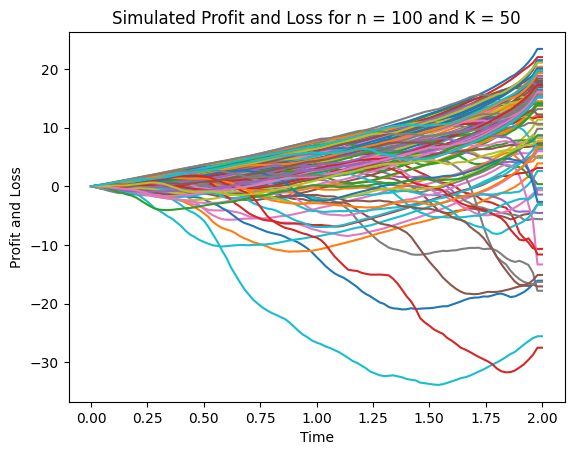

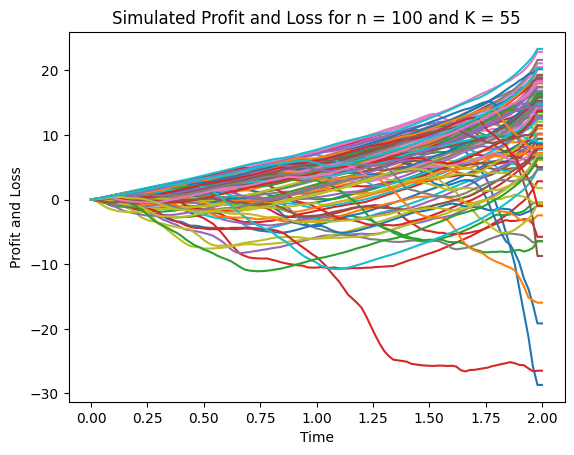

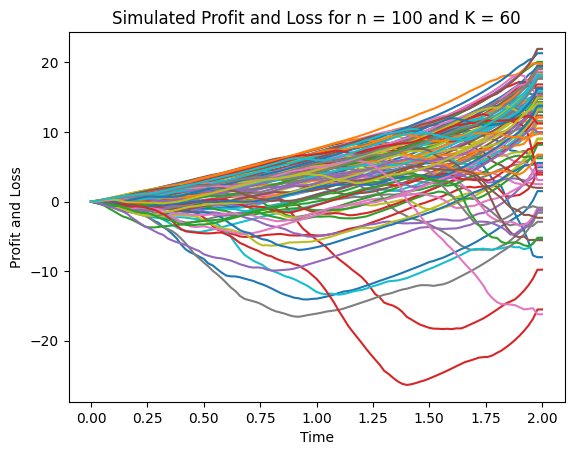

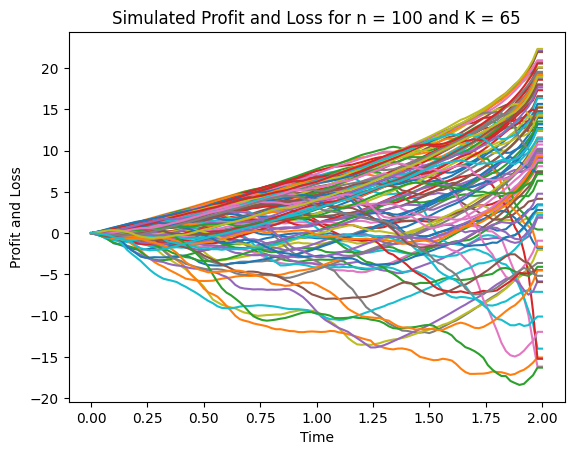

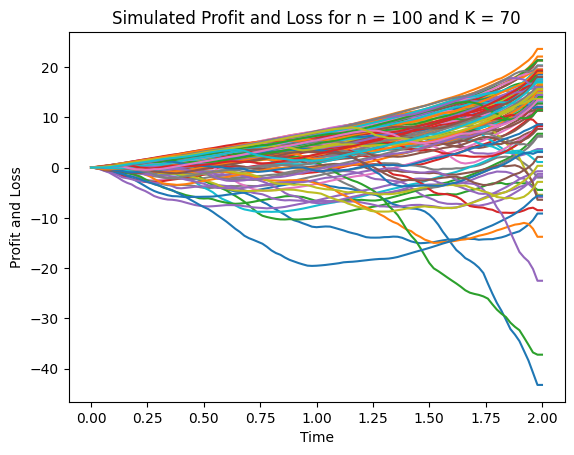

In [9]:
def d_plus(s,k,v):
    return (np.log(s/k) + 0.5*v**2)/np.sqrt(v)

def gamma_BS(t,s,sigma):
    out = (s*sigma*np.sqrt(T-t))
    t = out!=0
    out[t] = 1/out[t]
    out[~t] = 0
    out * norm.cdf(d_plus(s,K,sigma**2*T))
    return out

def simu_path_PaL(M,S0,sigma_0, Lambda, gamma, T, N, K, c, r):
    S_Paths = simu_path_S(M,S0,sigma_0, Lambda, gamma, T, N)
    S_Paths_squared = S_Paths**2
    Sigma_Paths = simu_path_sigma(M,sigma_0, Lambda, gamma, T, N)
    Sigma_Paths_squared = Sigma_Paths**2
    out = np.zeros([N+1,M])
    for i in range(1,N+1):
        first_term = np.exp(r*(T-i*T/N))
        second_term = (sigma_0**2 - Sigma_Paths_squared[i,:])* S_Paths_squared[i,:]
        third_term = gamma_BS(i*T/N,S_Paths[i,:],sigma_0)  
        out[i,:] = first_term*second_term*third_term*T/N 
    final_sum = np.cumsum(out,axis=0)
    return final_sum/2

K_list = [50 + 5*i for i in range(21)]
# Plotting the profit and loss for different values of K (5 first)
for K in K_list[:5]:
    plt.figure()
    plt.title("Simulated Profit and Loss for n = 100 and K = " + str(K))
    plt.plot(np.linspace(0,T,101),simu_path_PaL(100,S0,sigma_0, Lambda, gamma, T, 100, K, c, r))
    plt.xlabel("Time")
    plt.ylabel("Profit and Loss")
    plt.show()
